In [1]:
# 1. Descriptive analysis - explore what's inside the data set. 
# 2. Total sales, average sales, minimum sales, maximum sales
# 3. Probabilities:
# 3.1. P(Gendre > 10), P(G > 10 | Gendre == Sports), P(G > 10 | Publisher), P(Gendre | Platform), P(Gendre | Publisher)
# 4. Hypothesis testing:
# 4.1. Platform X revenue > 50
# 4.2. Platform X revenue > Platform Y revenue
# 4.3. Game A (Mario) revenue > Game B (Call of Duty) revenue

In [2]:
# Imports section
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline  

In [3]:
# Data loading & preprocessing section 
df = pd.read_csv('vgsales.csv', index_col=["Rank"])

In [4]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


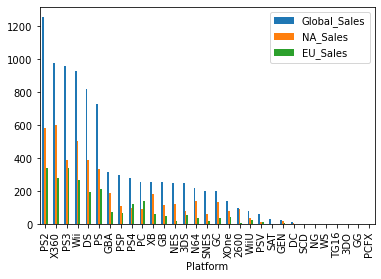

In [6]:
df3 = df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False)
df3.plot(y=['Global_Sales', 'NA_Sales', 'EU_Sales'], kind='bar')
plt.show()

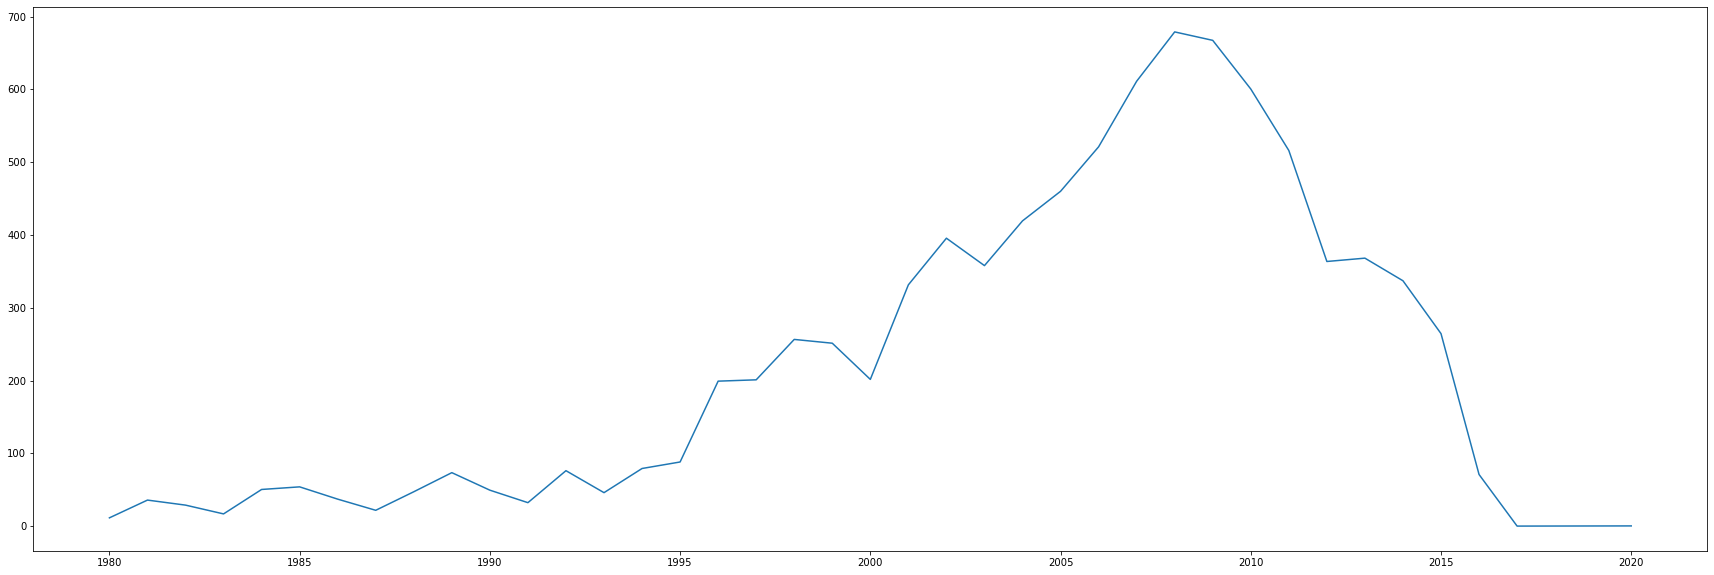

In [7]:
df4 = df.groupby('Year').sum()
plt.figure(figsize=(30, 10))
plt.plot(df4.index, df4['Global_Sales'])
plt.show()

In [8]:
df5 = df[(df['Year'] >= 2006) & (df['Year'] <= 2011)]
df5.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000
mean,2008.555511,0.242502,0.135248,0.049377,0.054035,0.481426
std,1.622230,0.829153,0.565095,0.243012,0.189686,1.662295
min,2006.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,2009.000000,0.080000,0.010000,0.000000,0.010000,0.150000
75%,2010.000000,0.220000,0.080000,0.020000,0.040000,0.410000
max,2011.000000,41.490000,29.020000,6.500000,8.460000,82.740000


In [9]:
df6 = df[(df['Year'] < 2006) | (df['Year'] > 2011)]
df6.describe()
# df6 = df5.groupby(['Name', 'Year']).sum()
# plt.figure(figsize=(30, 10))
# plt.plot(df6.index.get_level_values(0), df6['Global_Sales'])
# plt.show()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000
mean,2004.595260,0.284726,0.157926,0.103341,0.043514,0.589791
std,7.295472,0.814709,0.455696,0.357466,0.189930,1.477743
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.070000
50%,2004.000000,0.080000,0.030000,0.000000,0.010000,0.200000
75%,2012.000000,0.260000,0.130000,0.060000,0.030000,0.540000
max,2020.000000,29.080000,11.000000,10.220000,10.570000,40.240000


In [15]:
publishers1 = df[(df['Year'] < 2008)]
publishers2 = df[(df['Year'] >= 2008)]
# plt.figure(figsize=(30,10))
# plt.bar(publishers1.index, publishers1['Name'])
# plt.bar(publishers2.index, publishers2['Name'])
# plt.show()

In [24]:
print('Pre-2008: ', publishers1['Publisher'].nunique(), '\nPost-2008: ', publishers2['Publisher'].nunique())

Pre-2008:  390 
Post-2008:  339


In [27]:
df[df['Year'] > 2016]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [35]:
df10 = df.groupby(['Publisher', 'Year']).count()
df10.describe()

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,7.018957,7.018957,7.018957,7.018957,7.018957,7.018957,7.018957,7.018957
std,13.583445,13.583445,13.583445,13.583445,13.583445,13.583445,13.583445,13.583445
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000


In [41]:
# import numpy as np
# df11 = df[['Year', 'Publisher']]
# plt.pcolor(df11)
# plt.yticks(np.arange(0.5, len(df11.index), 1), df11.index)
# plt.xticks(np.arange(0.5, len(df11.columns), 1), df11.columns)
# plt.show()

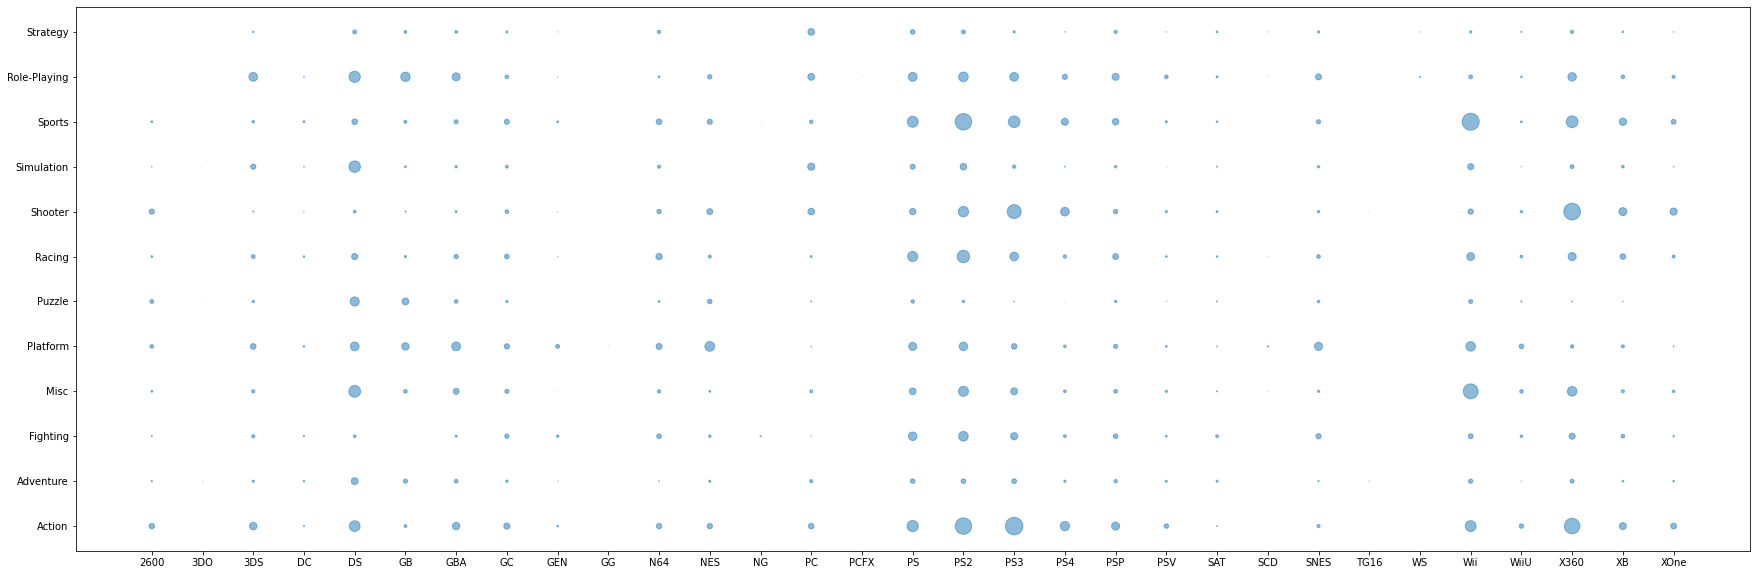

In [53]:
df11 = df.groupby(['Platform', 'Genre']).sum()
plt.figure(figsize=(30, 10))
plt.scatter(df11.index.get_level_values(0), df11.index.get_level_values(1), s=df11['Global_Sales'], alpha=0.5)
plt.show()

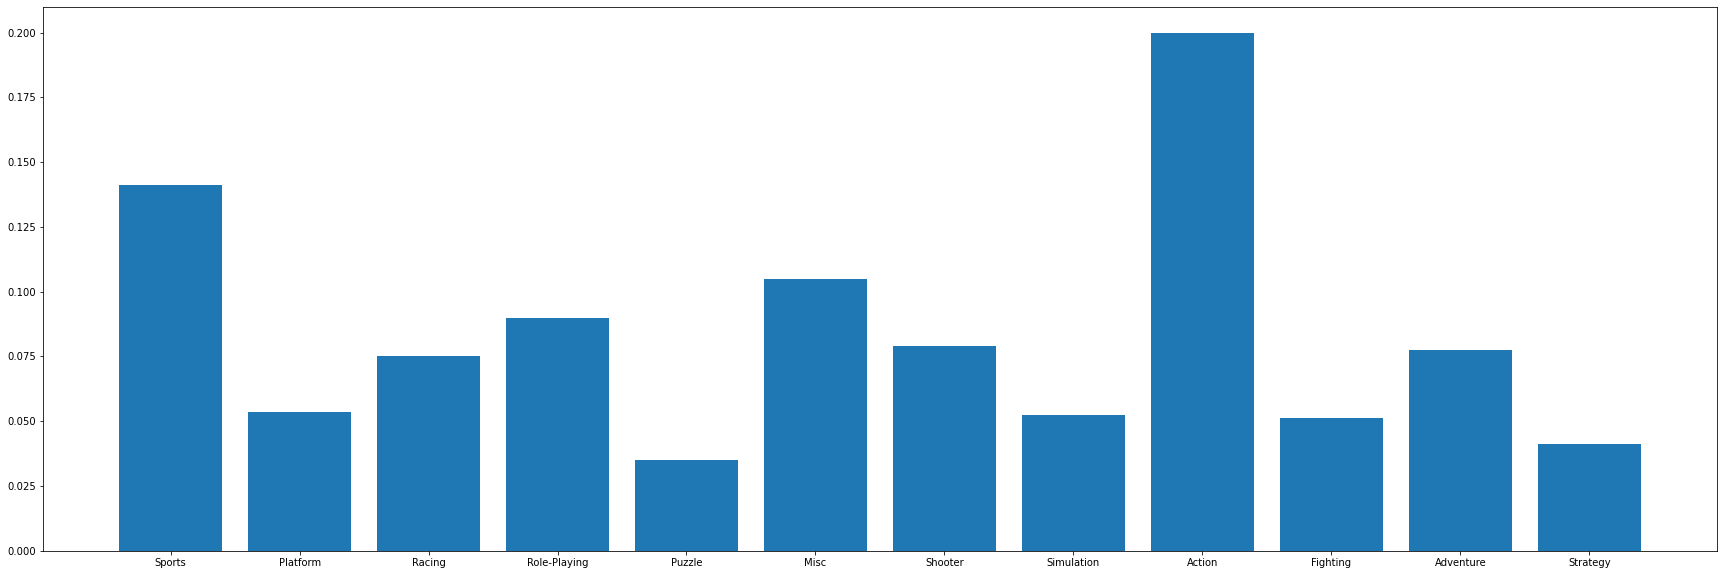

In [67]:
# P(Genre > 10), eg: P (Sports > 10)
# Naive def (# success / # possible)
df['Greater10'] = np.where(df['Global_Sales'] > 10, 1, 0)
# P (Global_Sales > 10)
# print (df['Greater10'].sum() / len(df))

# P (Sports > 10)
# print (df[df['Genre'] == 'Sports']['Greater10'].sum() / len(df[df['Genre'] == 'Sports']))

# P (Sports) 
n_success = len(df[df['Genre'] == 'Sports'])
n_total = len(df)
# print (n_success / n_total)

# P (Genre)
genre = df['Genre'].unique()
p = []
for g in genre:
    n_success_for_g = len(df[df['Genre'] == g])
    p.append(n_success_for_g / n_total)
plt.figure(figsize=(30, 10))
plt.bar(genre, p)
plt.show()

In [71]:
# P(G > 10 | Genre = Sports)
# P(G > 10 & Genre == Sports) / P(Genre == Sports)
p1 = len(df[(df['Greater10'] == 1) & (df['Genre'] == 'Sports')])
p2 = len(df[df['Genre'] == 'Sports'])

print (p1 / p2)

p1 = len(df[(df['Greater10'] == 1) & (df['Genre'] == 'Action')])
p2 = len(df[df['Genre'] == 'Action'])

print (p1 / p2)

0.0017050298380221654
0.0027141133896260556
